# 3) Machine Learning model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_pickle('Fire_danger.pkl')

In [3]:
df

,time,longitude,latitude,bi,danger_risk,dc,dmc,erc,ffmc,ic,isi,kbdi,sc
143,1979-06-01,0.00,54.25,0.0,1.0,4.941989,0.897482,0.0,39.412701,0.0,0.051276,0.475582,0.0
144,1979-06-01,0.00,54.00,0.0,1.0,5.105268,1.163779,0.0,46.037491,0.0,0.201392,0.509765,0.0
145,1979-06-01,0.00,53.75,0.0,1.0,5.202592,1.423807,0.0,50.706917,0.0,0.344205,0.640720,0.0
146,1979-06-01,0.00,53.50,0.0,1.0,5.721916,2.786665,0.0,65.214951,0.0,0.884310,0.980370,0.0
147,1979-06-01,0.00,53.25,0.0,1.0,5.741457,3.306364,1.0,67.533035,0.0,0.949178,1.028400,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174423806,2020-09-01,-0.25,38.25,0.0,3.5,458.990448,106.611412,0.0,86.399529,2.0,5.331127,83.025909,1.0
174423815,2020-09-01,-0.25,36.00,0.0,4.0,554.472107,123.896194,2.0,86.455887,0.0,8.603022,82.866753,0.0
174423816,2020-09-01,-0.25,35.75,6.0,4.0,584.553833,301.949432,4.0,88.970139,5.0,7.722607,105.309006,1.0
174423817,2020-09-01,-0.25,35.50,7.0,5.0,668.230286,599.772339,7.0,93.640953,8.0,12.611588,167.794479,1.0


# KMeans

In [4]:
n_clusters=4

times = df['time'].unique()[0:4]
df_1979 = df[df['time'].isin(times)]

X = df_1979.drop(['time'], axis=1)
scaler = RobustScaler()
scaled_X = scaler.fit_transform(X)

kmeans = KMeans(n_clusters)
kmeans.fit(scaled_X)
new_centroids = []
magnitude = []
for center in kmeans.cluster_centers_:
    magnitude.append(np.sqrt(center.dot(center)))
idx_argsort = np.argsort(magnitude)
kmeans.cluster_centers_ = kmeans.cluster_centers_[idx_argsort]
kmeans.labels_ = kmeans.predict(scaled_X)

df_1979['label'] = kmeans.labels_

<ipython-input-4-39f5819ad9aa>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1979['label'] = kmeans.labels_


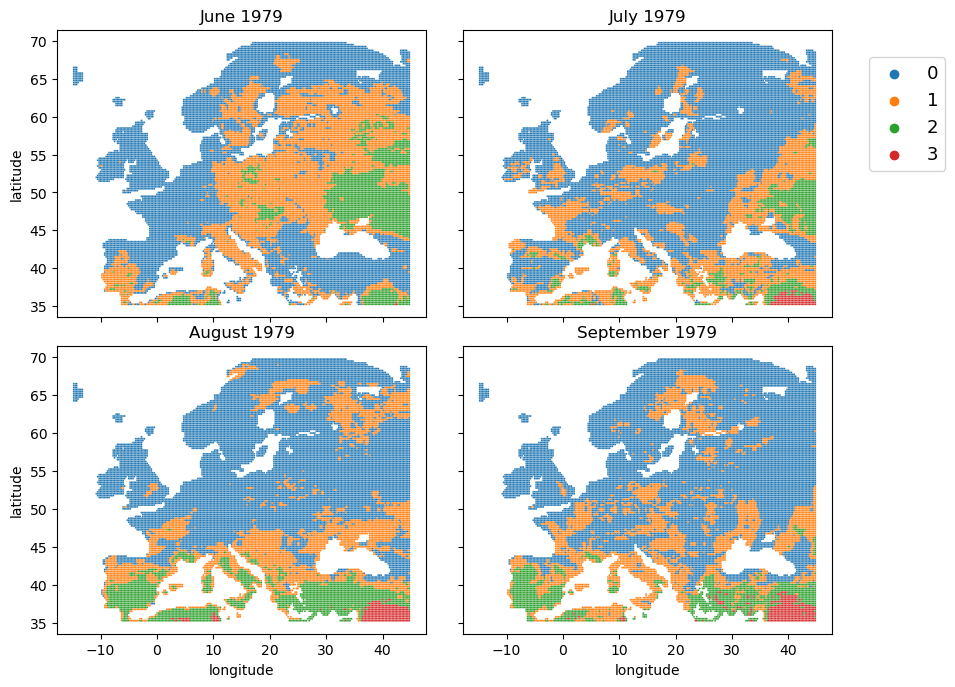

In [5]:
june_1979 = df_1979[df_1979['time'] == df_1979['time'].unique()[0]]
july_1979 = df_1979[df_1979['time'] == df_1979['time'].unique()[1]]
august_1979 = df_1979[df_1979['time'] == df_1979['time'].unique()[2]]
september_1979 = df_1979[df_1979['time'] == df_1979['time'].unique()[3]]


fig, ax = plt.subplots(2,2, figsize=(10,8), dpi=100, sharex=True, sharey=True)

sns.scatterplot(ax=ax[0,0], data=june_1979 ,x='longitude', 
                y='latitude', hue='label', palette='tab10', s=2)
sns.scatterplot(ax=ax[0,1], data=july_1979 ,x='longitude', 
                y='latitude', hue='label', palette='tab10', s=2, legend=False)
sns.scatterplot(ax=ax[1,0], data=august_1979 ,x='longitude', 
                y='latitude', hue='label', palette='tab10',  s=2, legend=False)
sns.scatterplot(ax=ax[1,1], data=september_1979 ,x='longitude', 
                y='latitude', hue='label', palette='tab10', s=2, legend=False)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
ax[0,0].legend(loc=(2.2,0.51), prop={'size': 13})

ax[0,0].set_title('June 1979')
ax[0,1].set_title('July 1979')
ax[1,0].set_title('August 1979')
ax[1,1].set_title('September 1979')

plt.show();

In [6]:
df_1979.groupby('label').describe()['danger_risk']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,52246.0,1.110008,0.289792,1.0,1.0,1.000000,1.000000,3.0
1,25387.0,2.531596,0.903856,1.0,2.0,2.666667,3.000000,5.0
2,8316.0,4.771021,0.867137,2.0,4.0,4.666667,5.666667,6.0
3,979.0,5.731699,0.567000,4.0,6.0,6.000000,6.000000,6.0


In [7]:
df_1979.groupby(['label']).mean()

,longitude,latitude,bi,danger_risk,dc,dmc,erc,ffmc,ic,isi,kbdi,sc
label,,,,,,,,,,,,
0,20.343184,54.972251,0.490583,1.110017,54.205791,10.671459,0.990947,63.592670,0.444800,1.475661,13.319261,0.110937
1,22.204051,49.341819,4.940009,2.531594,119.805305,44.014816,5.309371,85.832962,4.502186,5.668245,38.077328,0.939221
2,25.242454,42.442671,9.666787,4.771024,243.671295,157.315521,8.745070,92.184998,9.642857,14.434258,76.693909,2.028860
3,37.844229,36.362360,13.026558,5.731699,512.119690,597.926270,9.304392,96.477379,16.087845,22.673178,149.202393,3.259448


In [8]:
X = df_1979.drop(['time','label'], axis=1)
y = df_1979['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=27)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


In [9]:
random_forest = RandomForestClassifier(n_estimators=200, class_weight='balanced')
random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200)

In [10]:
label = random_forest.predict(X_test)

In [11]:
print(classification_report(y_test, label))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17265
           1       0.98      0.98      0.98      8365
           2       0.98      0.97      0.98      2688
           3       0.99      0.98      0.99       369

    accuracy                           0.99     28687
   macro avg       0.99      0.98      0.98     28687
weighted avg       0.99      0.99      0.99     28687



<AxesSubplot:>

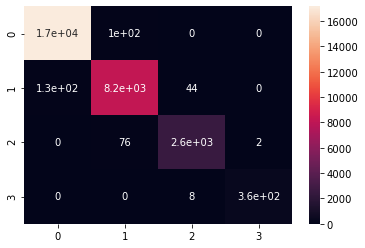

In [12]:
sns.heatmap(confusion_matrix(y_test, label), annot=True)

In [13]:
df = df[len(df_1979):]
X = df.drop(['time'], axis=1)
results = random_forest.predict(X)

df['label'] = results
df = pd.concat([df,df_1979])

<ipython-input-13-6f8201f923cb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = results


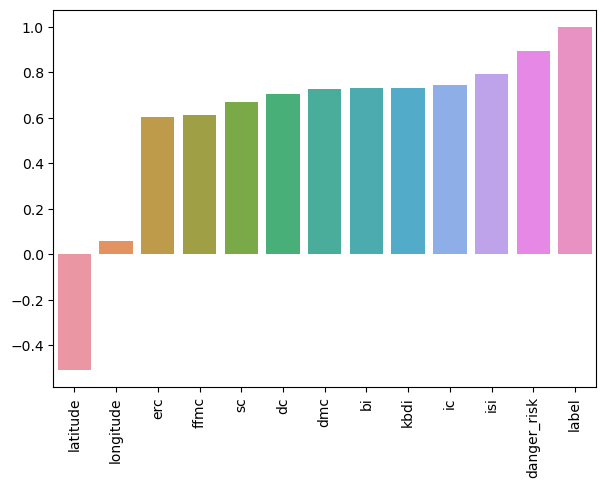

In [14]:
correlation_features = df.corr()['label'].sort_values()

plt.figure(figsize=(7,5), dpi=100)
sns.barplot(x=correlation_features.index, y=correlation_features.values)
plt.xticks(rotation=90);

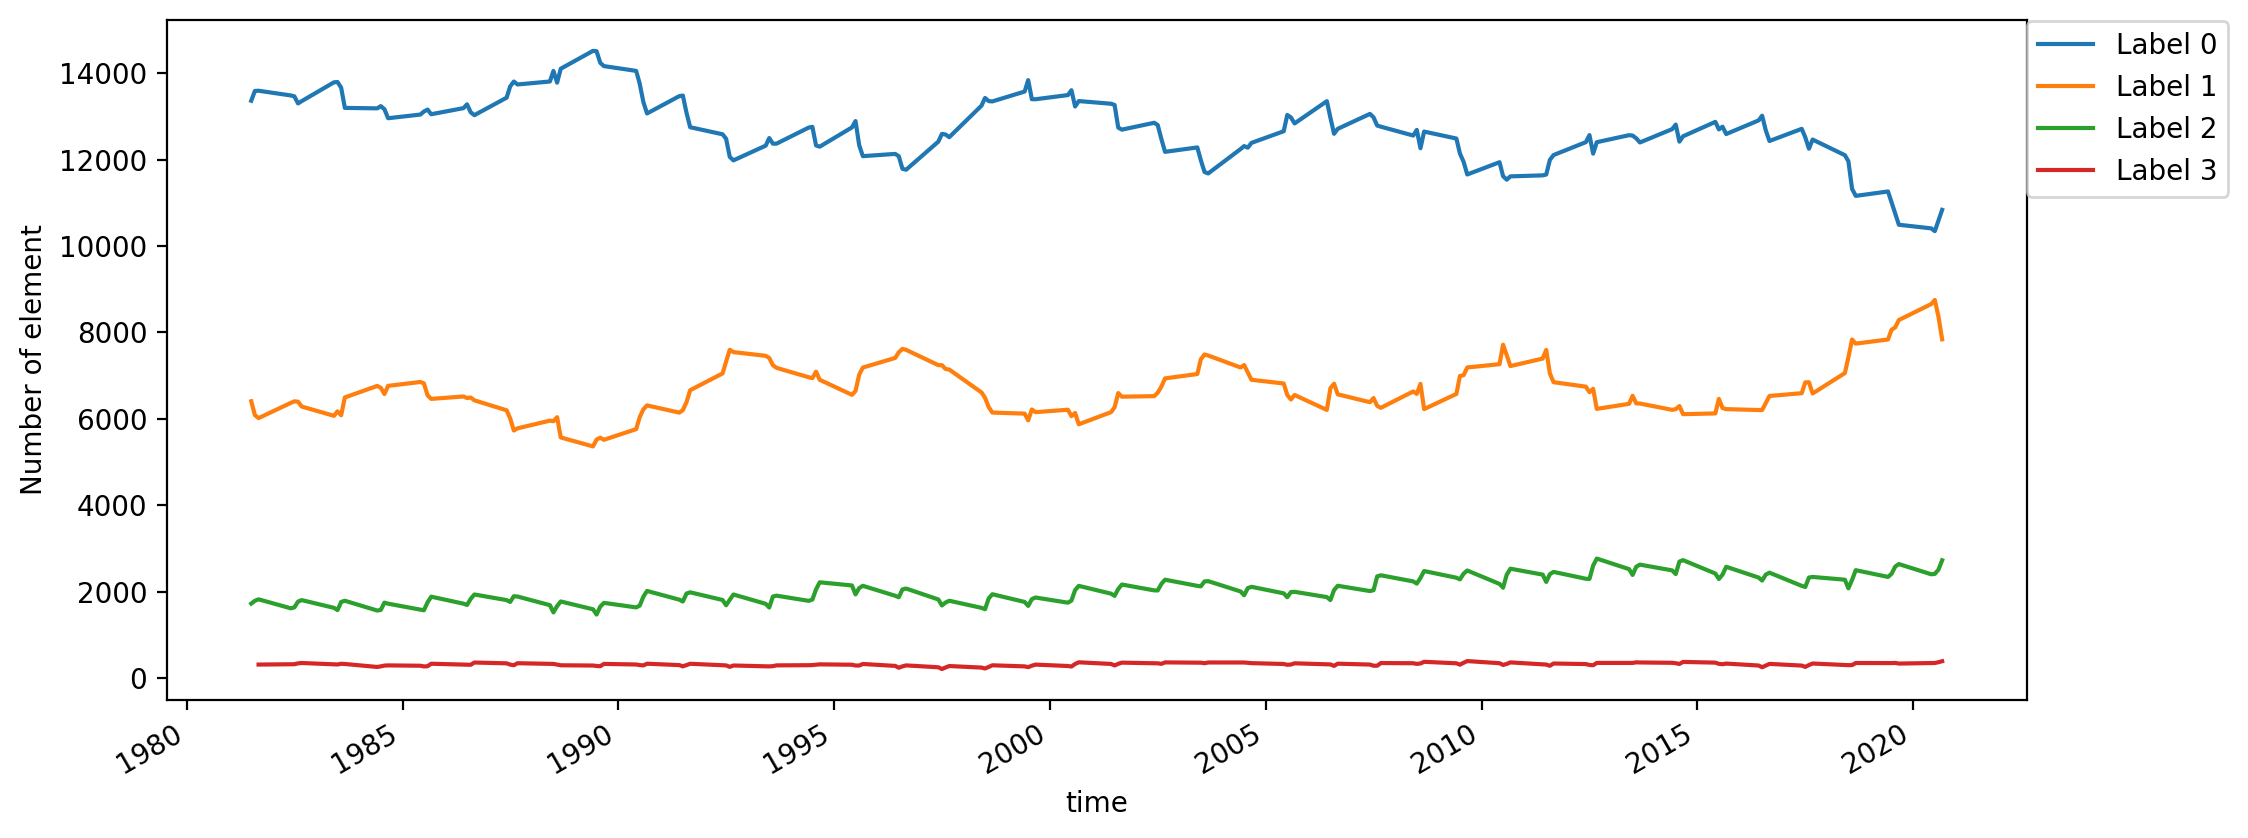

In [15]:
time_series = df.groupby(['label','time']).count()['bi']

plt.figure(figsize=(12,5), dpi=200)
for i in range(n_clusters):
    time_series.xs(i).rolling(window=10).mean().plot()
    plt.legend(['Label 0', 'Label 1', 'Label 2', 'Label 3',], loc=(1,0.74))
    plt.ylabel('Number of element')

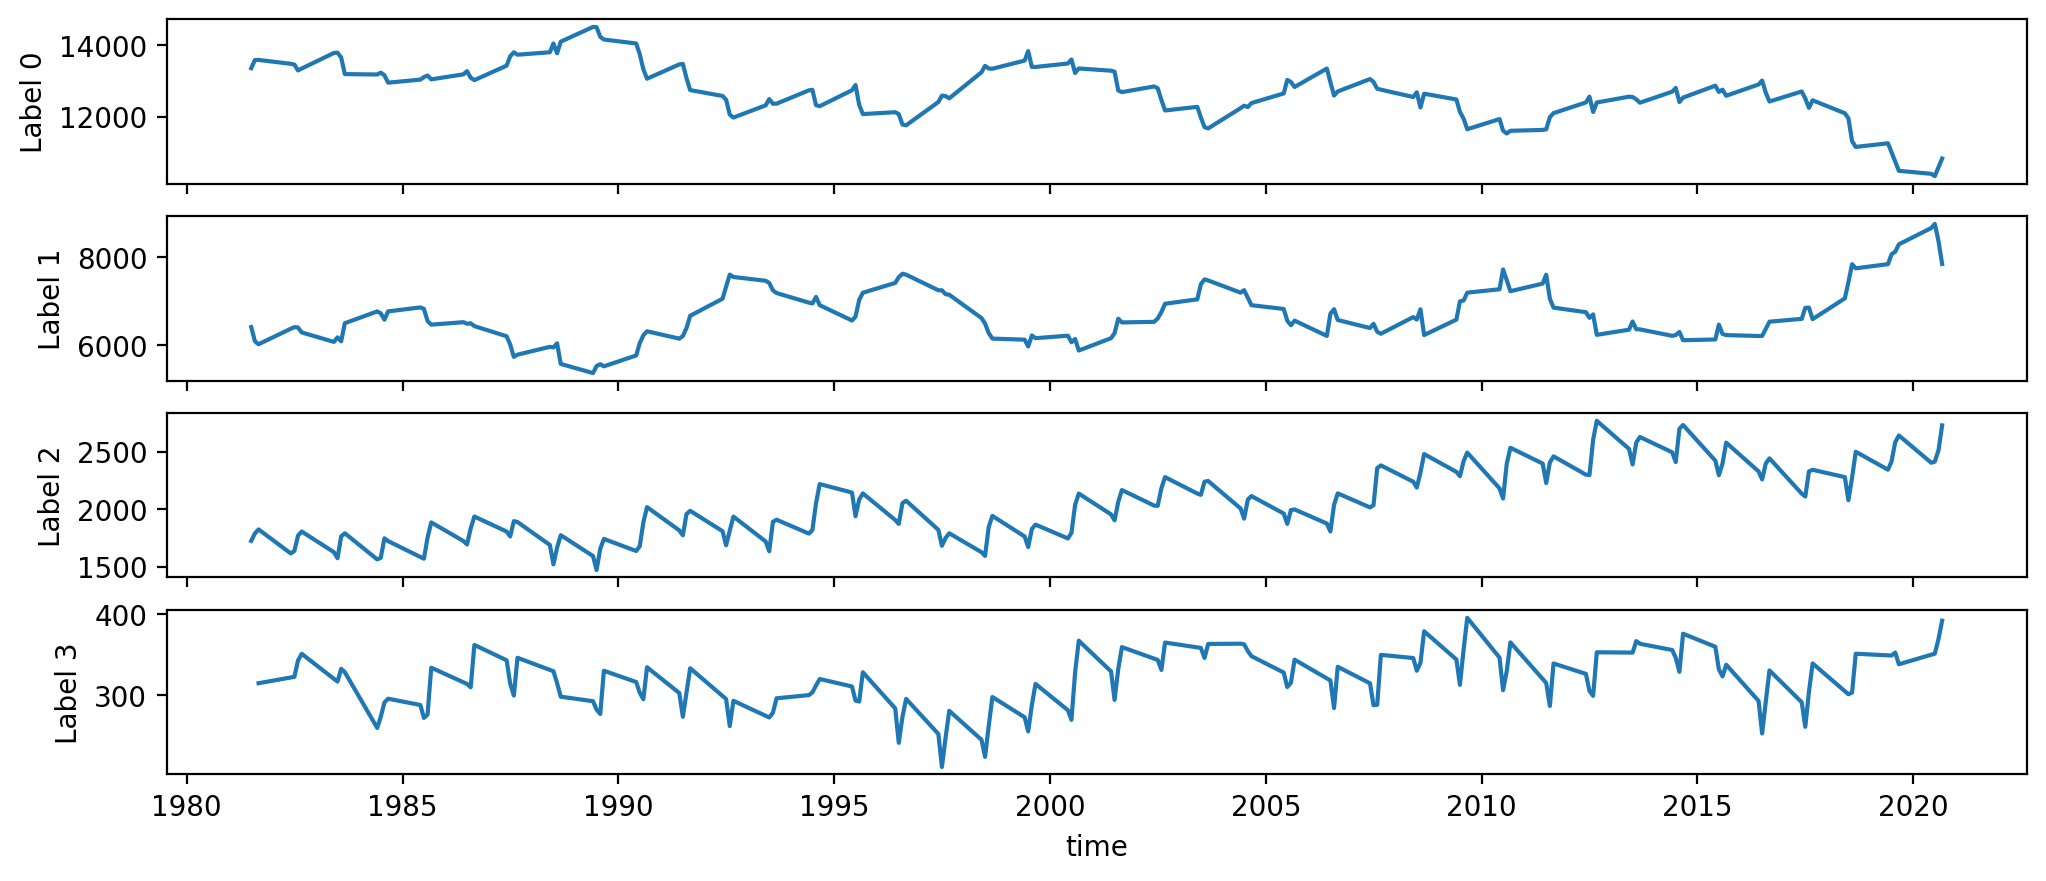

In [17]:
fig, ax = plt.subplots(n_clusters,1, figsize=(12,5), dpi=200, sharex=True)

for i in range(n_clusters):
    sns.lineplot(ax=ax[i], data=time_series.xs(i).rolling(window=10).mean())
    ax[i].set_ylabel(f'Label {i}')
    
plt.show()

In [18]:
TIME_1 = '1979-08-01'
TIME_2 = '2020-08-01'

first_map = df[df['time'] == TIME_1]['label']
second_map = df[df['time'] == TIME_2]['label']

first_map = first_map.reset_index()['label']
second_map = second_map.reset_index()['label']

lotlan_map = df[df['time'] == TIME_1]
lotlan_map.reset_index(inplace=True)

scores = first_map - second_map
scores = pd.concat([lotlan_map[['longitude','latitude']], scores], axis=1)

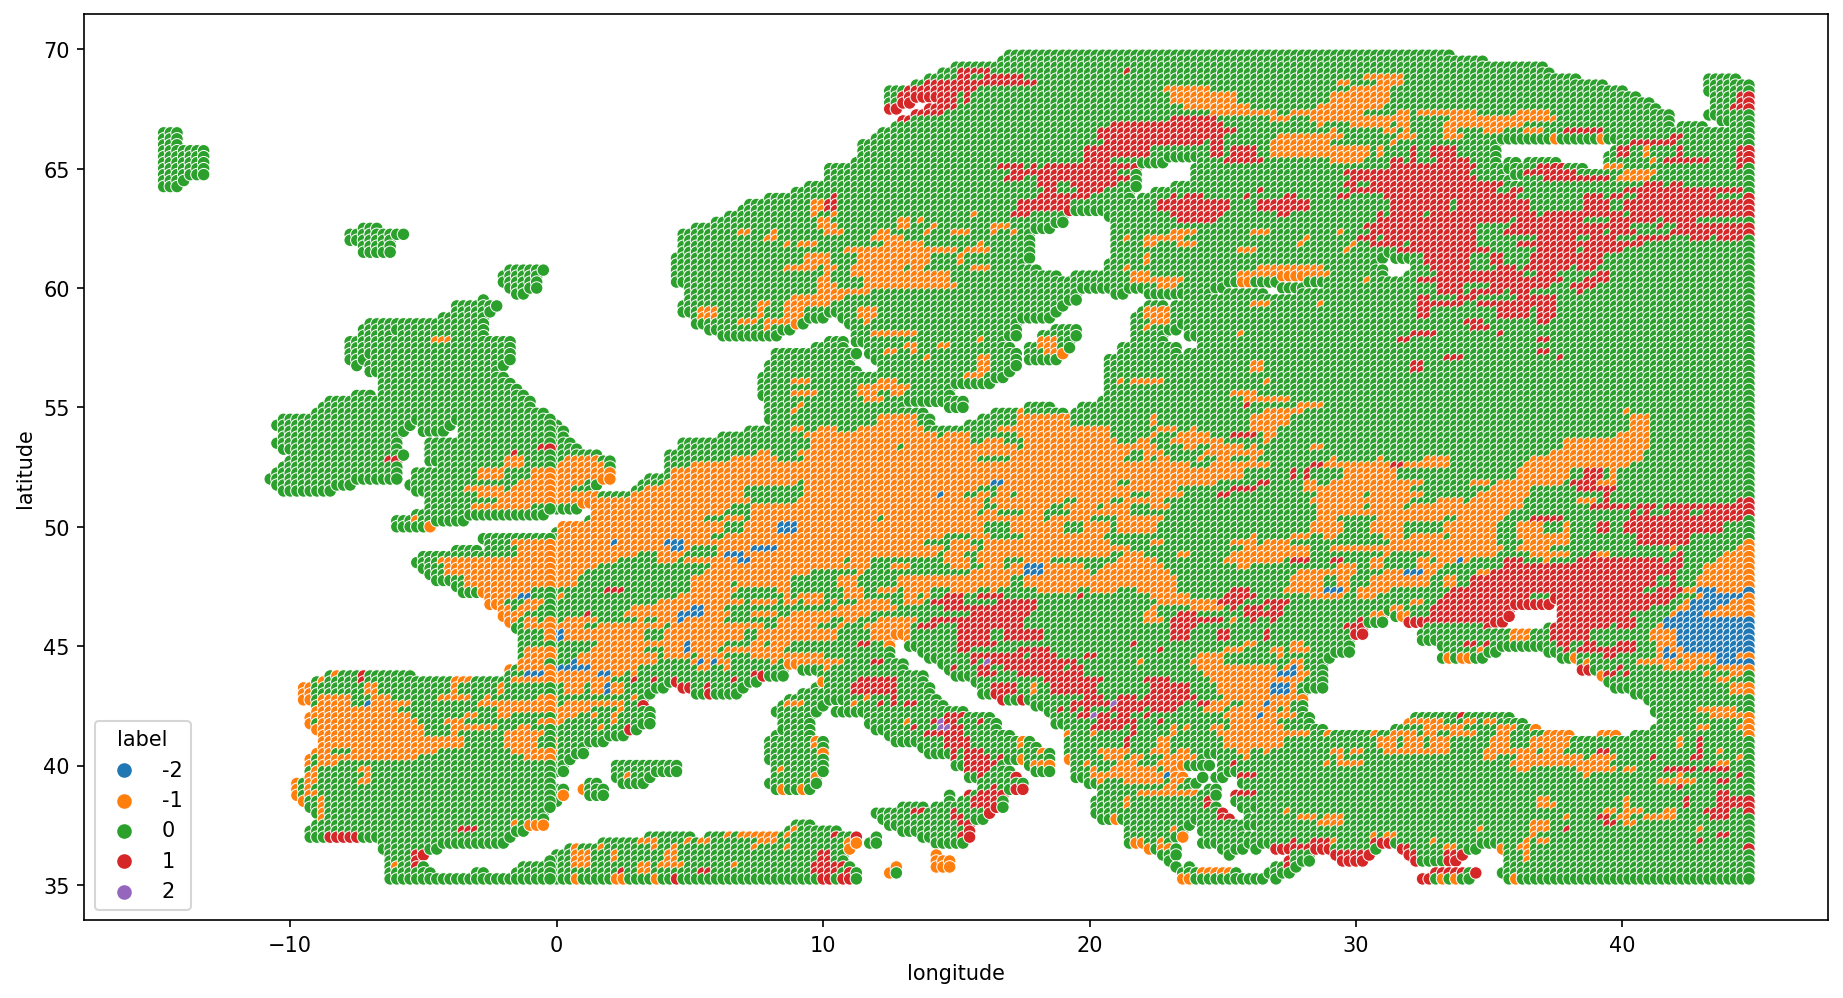

In [19]:
plt.figure(figsize=(15,8), dpi=150)
sns.scatterplot(data=scores, x='longitude', y='latitude', hue='label', palette='tab10');

In [20]:
df.to_pickle('Fire_danger_labeled.pkl')